<div style="background-color:rgba(128, 0, 128, 0.6);border-radius:5px;display:fill"><h1 style="text-align: center;padding: 12px 0px 12px 0px;">House Prices: Linear Regression with Polynomials</h1>
</div>

## Lesson

Linear/Lasso/Ridge Regression with Polynomials.

Introducing LabelEncoding

|Notebook| MAE | LeaderBoard|
| --- | --- | --- |
|QuickStart|38341.2045|0.29234|
|Extra Features|32285.7959|0.24425|
|Features + Lasso|31349.8387|0.24425|
|Features + Ridge|31348.1429|0.24422|



In [1]:
# Black formatter https://black.readthedocs.io/en/stable/

! pip install nb-black > /dev/null

%load_ext lab_black

<div style="background-color:rgba(128, 0, 128, 0.6);border-radius:5px;display:fill"><h1 style="text-align: center;padding: 12px 0px 12px 0px;">Import Libraries</h1>
</div>

A best practise is to include all libraries here.  However, I will put a few imports farther down where they are first used so beginners can learn with an "as needed" approach.

In [2]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

#
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

pd.options.display.max_columns = 100  # Want to view all the columns

<div style="background-color:rgba(128, 0, 128, 0.6);border-radius:5px;display:fill"><h1 style="text-align: center;padding: 12px 0px 12px 0px;">Library</h1>
</div>

Creating a few functions that we will reuse in each project.

In [3]:
def read_data(path):
    data_dir = Path(path)

    train = pd.read_csv(data_dir / "train.csv")
    test = pd.read_csv(data_dir / "test.csv")
    submission_df = pd.read_csv(data_dir / "sample_submission.csv")

    print(f"train data: Rows={train.shape[0]}, Columns={train.shape[1]}")
    print(f"test data : Rows={test.shape[0]}, Columns={test.shape[1]}")
    return train, test, submission_df

In [4]:
def create_submission(model_name, target, preds):
    sample_submission[target] = preds
    if len(model_name) > 0:
        sample_submission.to_csv(f"submission_{model_name}.csv", index=False)
    else:
        sample_submission.to_csv(f"submission.csv", index=False)

    return sample_submission[:5]

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


def show_scores(gt, yhat):
    rmse = mean_squared_error(gt, yhat)
    mae = mean_absolute_error(gt, yhat)

    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")

<div style="background-color:rgba(128, 0, 128, 0.6);border-radius:5px;display:fill"><h1 style="text-align: center;padding: 12px 0px 12px 0px;">Load Train/Test Data</h1>
</div>

- train.csv - Data used to build our machine learning model
- test.csv - Data used to build our machine learning model. Does not contain the target variable
- sample_submission.csv - A file in the proper format to submit test predictions

In [6]:
train, test, sample_submission = read_data(
    "../input/house-prices-advanced-regression-techniques"
)

train data: Rows=1460, Columns=81
test data : Rows=1459, Columns=80


In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In supervised learning problems, we have a label or target.

In [9]:
TARGET = "SalePrice"

## Identify Feature Types

There are two types of features:
  - categorical
  - numerical
  
Objects types that are int8 are limited to 128 values, so we are treating them as categorical.

Since machine learning models only understand numbers, we must encode the categorical features.


In [10]:
# All the words are gone
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
# numerical_features = ["GrLivArea", "LotArea", "TotalBsmtSF", "FullBath"]
# FEATURES = features

<div style="background-color:rgba(128, 0, 128, 0.6);border-radius:5px;display:fill"><h1 style="text-align: center;padding: 12px 0px 12px 0px;">Missing Data</h1>
</div>

In [12]:
missing_vals = train.isna().sum()
# print(missing_vals[missing_vals > 0])
missing_vals[missing_vals > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [13]:
# Drop columns with more than 100 missing values
columns_to_drop = missing_vals[missing_vals > 100].index
train = train.drop(columns_to_drop, axis="columns")
test = test.drop(columns_to_drop, axis="columns")
print(columns_to_drop)

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [14]:
print(5 * "=", "Train", 5 * "=")
missing_vals = train.isna().sum()
print(missing_vals[missing_vals > 0])
print(5 * "=", "Test", 5 * "=")
missing_vals = test.isna().sum()
print(missing_vals[missing_vals > 0])

===== Train =====
MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64
===== Test =====
MSZoning         4
Utilities        2
Exterior1st      1
Exterior2nd      1
MasVnrType      16
MasVnrArea      15
BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinSF1       1
BsmtFinType2    42
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFullBath     2
BsmtHalfBath     2
KitchenQual      1
Functional       2
GarageType      76
GarageYrBlt     78
GarageFinish    78
GarageCars       1
GarageArea       1
GarageQual      78
GarageCond      78
SaleType         1
dtype: int64


In [15]:
cat_columns = list(train.select_dtypes(include=["category", "object"]).columns)
num_columns = list(test.select_dtypes(include=["number"]).columns)

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

# impute_median = SimpleImputer(strategy="median")
# impute_freq = SimpleImputer(strategy="most_frequent")
# ohe = OneHotEncoder(sparse=False)

# cat_transformer = make_pipeline(impute_freq, ohe)

# col_transformer = make_column_transformer(
#     (impute_median, num_columns),
#     (cat_transformer, cat_columns),
#     remainder="passthrough",
# )

In [17]:
imputer = SimpleImputer(strategy="mean")
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
# for i in [1, 3]:

## Impute Categorical

In [18]:
imputer = SimpleImputer(strategy="most_frequent")

train[cat_columns] = imputer.fit_transform(train[cat_columns])
test[cat_columns] = imputer.transform(test[cat_columns])

## Impute Numerical

In [19]:
imputer = SimpleImputer(strategy="mean")
train[num_columns] = imputer.fit_transform(train[num_columns])
# test[num_columns] = impute_median.transform(test[num_columns])
test[num_columns] = imputer.transform(test[num_columns])

In [20]:
# test["TotalBsmtSF"] = test["TotalBsmtSF"].fillna(0)

## Verify No Missing Data

In [21]:
print(5 * "=", "Train", 5 * "=")
missing_vals = train.isna().sum()
print(missing_vals[missing_vals > 0])
print(5 * "=", "Test", 5 * "=")
missing_vals = test.isna().sum()
print(missing_vals[missing_vals > 0])

===== Train =====
Series([], dtype: int64)
===== Test =====
Series([], dtype: int64)


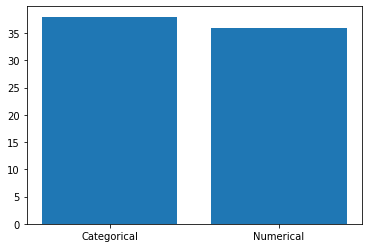

Categorical features: 38
Numerical features: 36


In [22]:
features = []
categorical_features = []
numerical_features = []

for feature in test.columns:
    features.append(feature)
    if test.dtypes[feature] == object or test.dtypes[feature] == "int8":
        categorical_features.append(feature)
    else:
        numerical_features.append(feature)

plt.bar([1, 2], [len(categorical_features), len(numerical_features)])
plt.xticks([1, 2], ("Categorical", "Numerical"))
plt.show()

print("Categorical features:", len(categorical_features))
print("Numerical features:", len(numerical_features))

<div style="background-color:rgba(128, 0, 128, 0.6);border-radius:5px;display:fill"><h1 style="text-align: center;padding: 12px 0px 12px 0px;">Encode Categorical Features</h1>
</div>

In [23]:
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [24]:
from sklearn.preprocessing import LabelEncoder


def label_encoder(train, test, columns):
    for col in columns:
        train[col] = train[col].astype(str)
        test[col] = test[col].astype(str)
        train[col] = LabelEncoder().fit_transform(train[col])
        test[col] = LabelEncoder().fit_transform(test[col])
    return train, test

In [25]:
train, test = label_encoder(train, test, categorical_features)

In [26]:
FEATURES = features

In [27]:
y = train[TARGET]
X = train[FEATURES].copy()

X_test = test[FEATURES].copy()

In [28]:
X.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,60.0,3,8450.0,1,3,3,0,4,0,5,2,2,0,5,7.0,5.0,2003.0,2003.0,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706.0,5,0.0,150.0,856.0,1,0,1,4,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,2,8.0,6,0.0,1,2003.0,1,2.0,548.0,4,4,2,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,8,4
1,2.0,20.0,3,9600.0,1,3,3,0,2,0,24,1,2,0,2,6.0,8.0,1976.0,1976.0,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978.0,5,0.0,284.0,1262.0,1,0,1,4,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,3,6.0,6,1.0,1,1976.0,1,2.0,460.0,4,4,2,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,8,4
2,3.0,60.0,3,11250.0,1,0,3,0,4,0,5,2,2,0,5,7.0,5.0,2001.0,2002.0,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486.0,5,0.0,434.0,920.0,1,0,1,4,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,2,6.0,6,1.0,1,2001.0,1,2.0,608.0,4,4,2,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,8,4
3,4.0,70.0,3,9550.0,1,0,3,0,0,0,6,2,2,0,5,7.0,5.0,1915.0,1970.0,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216.0,5,0.0,540.0,756.0,1,2,1,4,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,2,7.0,6,1.0,5,1998.0,2,3.0,642.0,4,4,2,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,8,0
4,5.0,60.0,3,14260.0,1,0,3,0,2,0,15,2,2,0,5,8.0,5.0,2000.0,2000.0,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655.0,5,0.0,490.0,1145.0,1,0,1,4,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,2,9.0,6,1.0,1,2000.0,1,3.0,836.0,4,4,2,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,8,4


## Scale the Data

Doesn't make a difference so it's commented out.

In [29]:
from sklearn.preprocessing import StandardScaler, RobustScaler

scaler = RobustScaler()

X = scaler.fit(X).transform(X)
X_test = scaler.transform(X_test)

In [30]:
X[:2]

array([[-1.        ,  0.2       ,  0.        , -0.25407609,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.7       ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.5       ,  0.        ,  0.65217391,  0.24324324,  0.        ,
         0.        ,  0.        ,  0.        , -1.        ,  1.19330289,
        -1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.45279045,  0.        ,  0.        ,
        -0.55982906, -0.26965174,  0.        ,  0.        ,  0.        ,
         0.        , -0.45360825,  1.17307692,  0.        ,  0.38006952,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        , -1.        ,  1.        ,  0.        , -1.        ,
         0.        ,  0.62804708,  0.        ,  0.        ,  0.2815735 ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.52941176,
         0.        ,  0.        ,  0.        ,  0. 

<div style="background-color:rgba(128, 0, 128, 0.6);border-radius:5px;display:fill"><h1 style="text-align: center;padding: 12px 0px 12px 0px;">Train Model with Train/Test Split</h1>
</div>

We split the training data so we can evaluate how well each model performs  We are saving 20% of the training data to validate the model(s).

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    test_size=0.2,  # Save 20% for validation
    random_state=42,  # Make the split deterministic
)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1168, 74), (1168,), (292, 74), (292,))

<div style="background-color:rgba(128, 0, 128, 0.6);border-radius:5px;display:fill"><h1 style="text-align: center;padding: 12px 0px 12px 0px;">Create Models</h1>
</div>

In [32]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge


def run_regression_model(model):
    #     model = Lasso(alpha=0.5)
    poly_features = PolynomialFeatures(degree=3, include_bias=False)
    X_poly = poly_features.fit_transform(X_train)

    model.fit(X_poly, y_train)

    valid_preds = model.predict(poly_features.transform(X_valid))
    test_preds = model.predict(poly_features.transform(X_test))

    return valid_preds, test_preds

In [33]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
model = LinearRegression()
model.fit(X_poly, y_train)

LinearRegression()

In [34]:
valid_preds = model.predict(poly_features.transform(X_valid))
show_scores(y_valid, valid_preds)

MAE: 48843.5453
RMSE: 6827470430.5227


In [35]:
test_preds = model.predict(poly_features.transform(X_test))
create_submission("poly2", TARGET, test_preds)

,Id,SalePrice
0,1461,1.514182e+05
1,1462,-1.992360e+06
2,1463,1.571947e+05
3,1464,1.758333e+05
4,1465,2.405179e+05


## Fit/Train the model

In [36]:
valid_preds, test_preds = run_regression_model(LinearRegression())
show_scores(y_valid, valid_preds)
create_submission("", TARGET, test_preds)

MAE: 77687.1177
RMSE: 64444463278.5391


,Id,SalePrice
0,1461,1.360350e+05
1,1462,-1.277472e+07
2,1463,1.810267e+05
3,1464,1.992282e+05
4,1465,9.969117e+04



- https://stackoverflow.com/questions/20681864/lasso-on-sklearn-does-not-converge
- https://stats.stackexchange.com/questions/445831/how-is-tol-used-in-scikit-learns-lasso-and-elasticnet


In [37]:
valid_preds, test_preds = run_regression_model(Lasso(alpha=1.0, max_iter=10_000, tol= 0.000001))
show_scores(y_valid, valid_preds)
create_submission("lasso", TARGET, test_preds)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.590e+08, tolerance: 6.967e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


MAE: 22934.9882
RMSE: 1115693054.0343


,Id,SalePrice
0,1461,122666.453741
1,1462,343970.229427
2,1463,189887.026908
3,1464,204891.274772
4,1465,201426.579969


In [38]:
valid_preds, test_preds = run_regression_model(Ridge(alpha=0.5, max_iter=1000, tol= 0.0001))
show_scores(y_valid, valid_preds)
create_submission("ridge", TARGET, test_preds)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "


MAE: 89769.6958
RMSE: 63274450130.8231


,Id,SalePrice
0,1461,1.599302e+05
1,1462,-8.381079e+07
2,1463,1.837330e+05
3,1464,1.837330e+05
4,1465,2.040841e+05
